<a href="https://colab.research.google.com/github/Supratim0406/Computer-Vision-Yolo-Model/blob/main/Helmet_Dection_using_Yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Check for GPU connection
!nvidia-smi

Mon Oct 20 12:43:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install Ultralytics Package

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.6 MB/s eta 0:00:00


In [ ]:
# Check the version of Ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


## Import Required libraries

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Dowload the dataset from Roboflow
 Dataset link - https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mvJDbHsYvCCdXlgpggSP")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detector-1 in yolov11:: 100%|██████████| 5696/5696 [00:00<00:00, 7764.29it/s]


In [ ]:
dataset.location

'/content/Helmet-Detector-1'

## Train YOLO11 model on customer dataset

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Helmet-Detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

## Evaluate Training Result

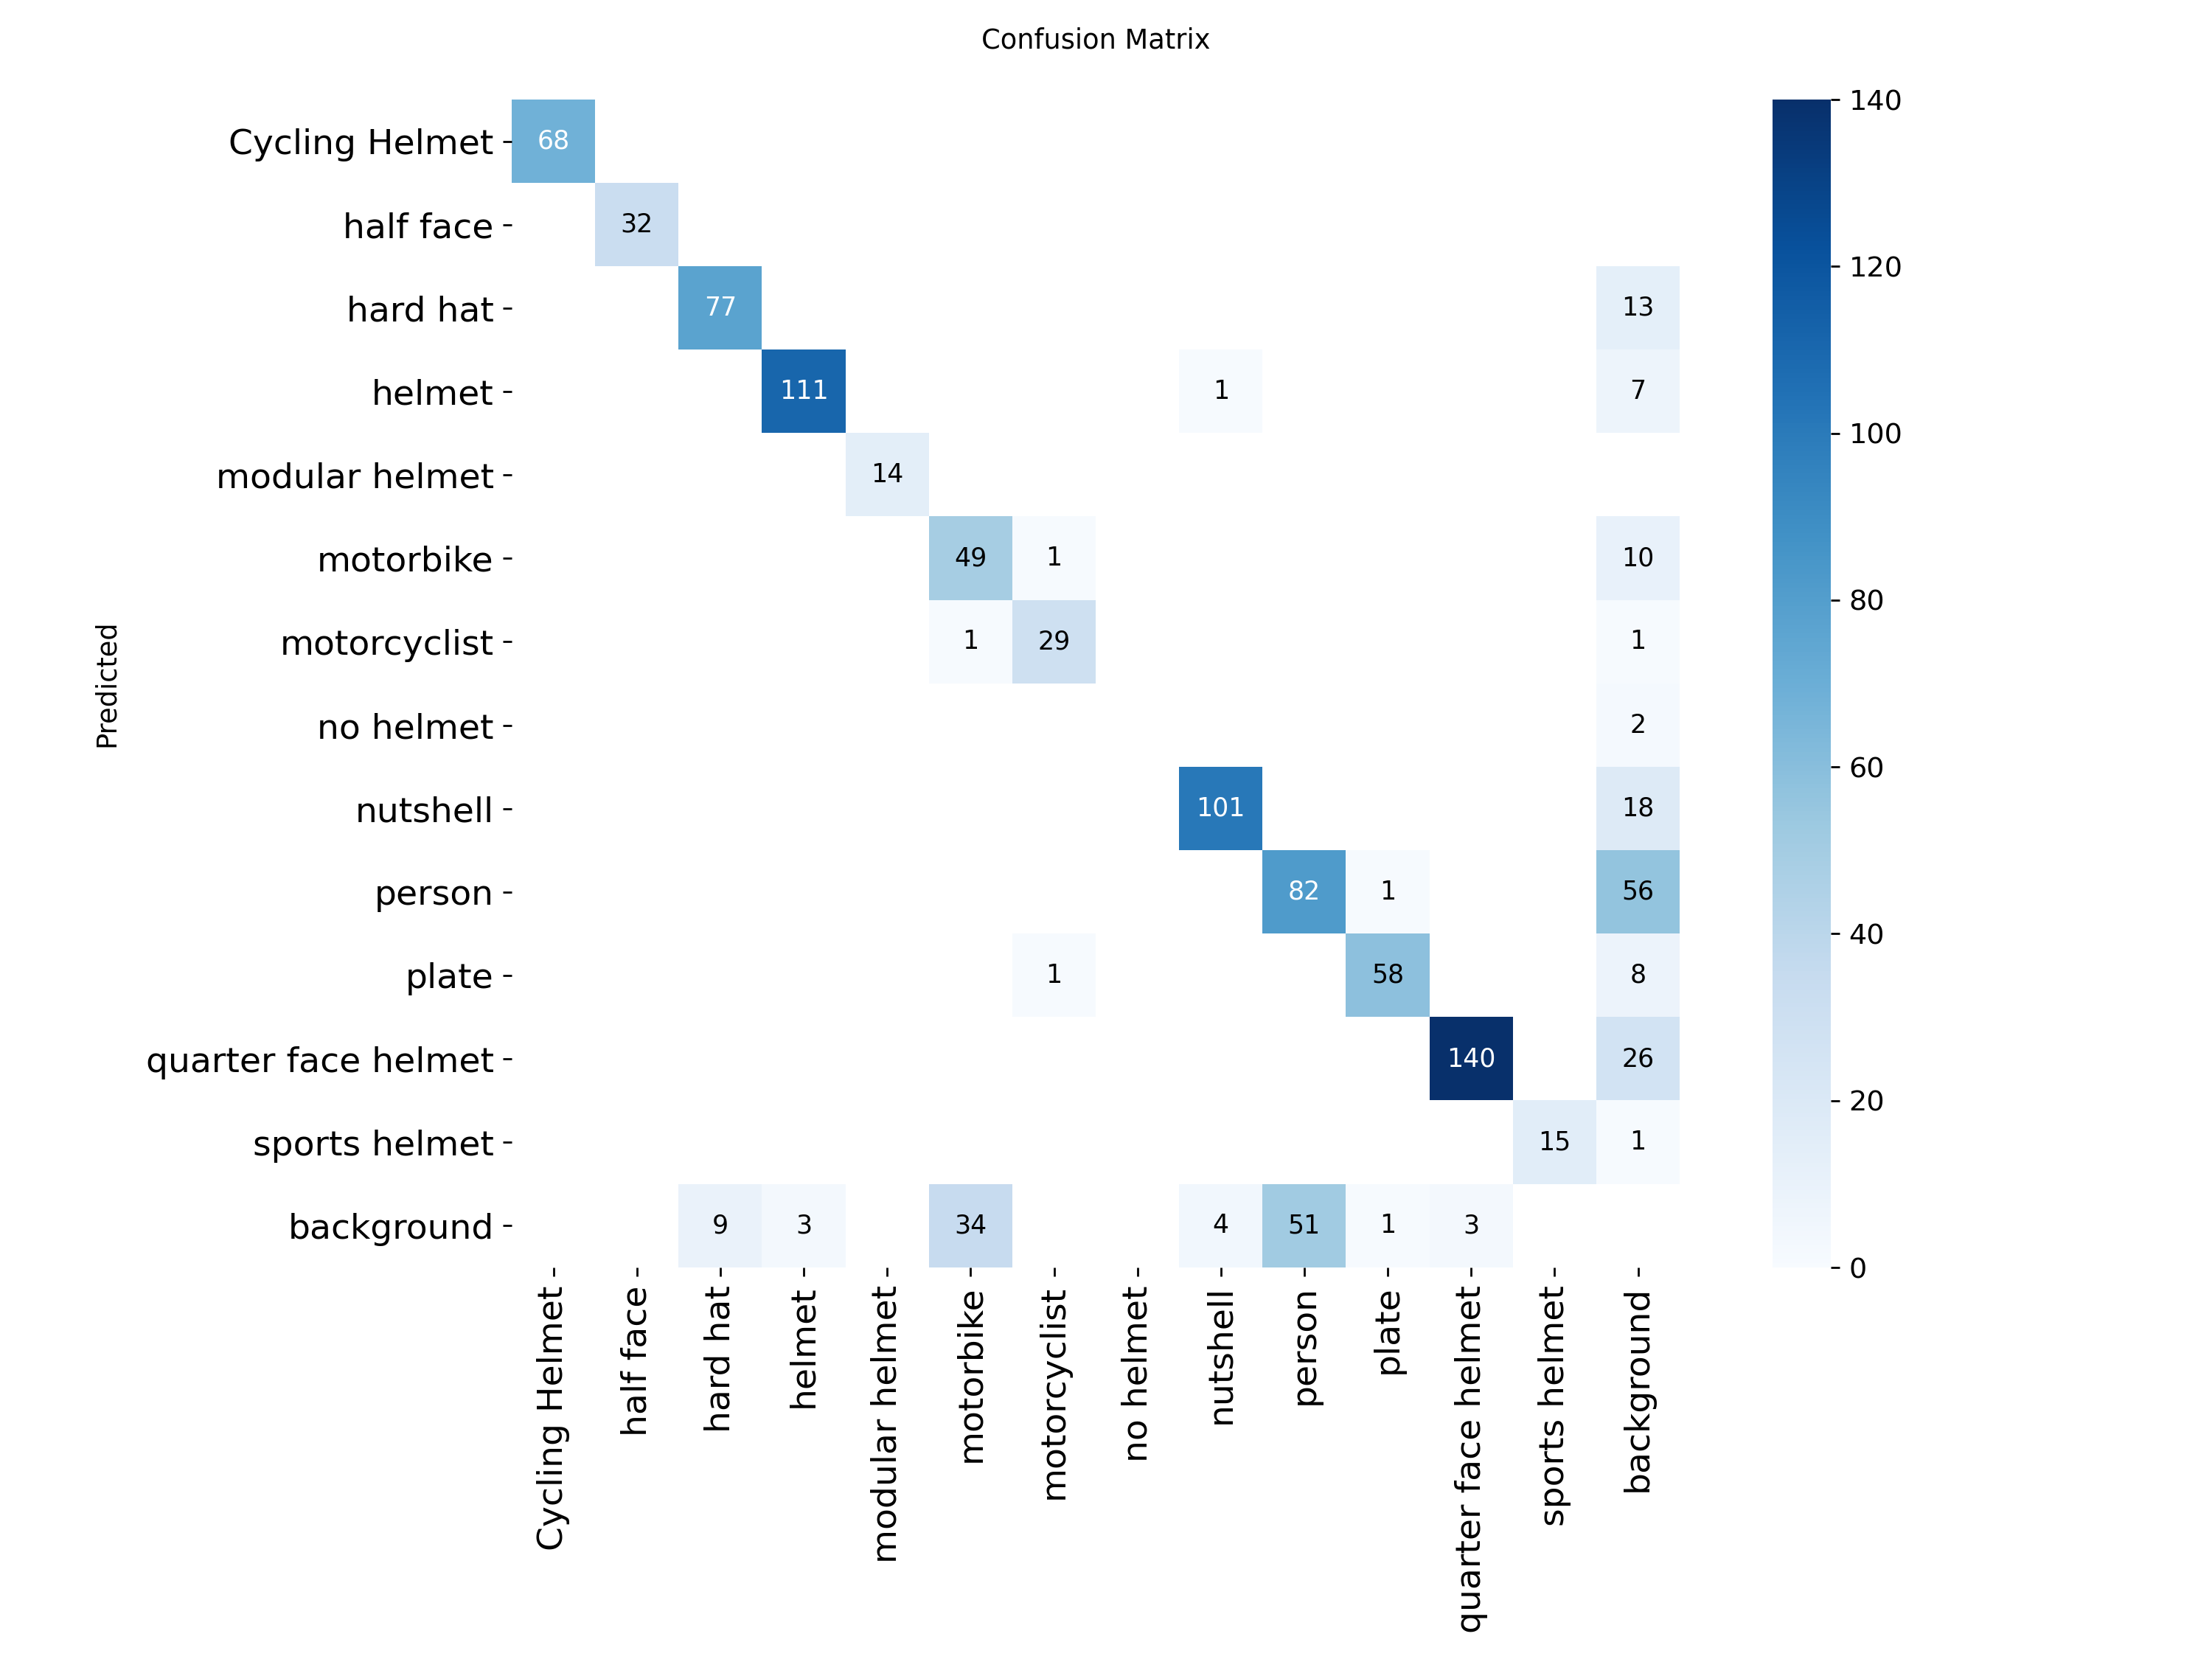

In [ ]:
from IPython.display import display, Image
Image("/content/runs/detect/train2/confusion_matrix.png", width=1000)

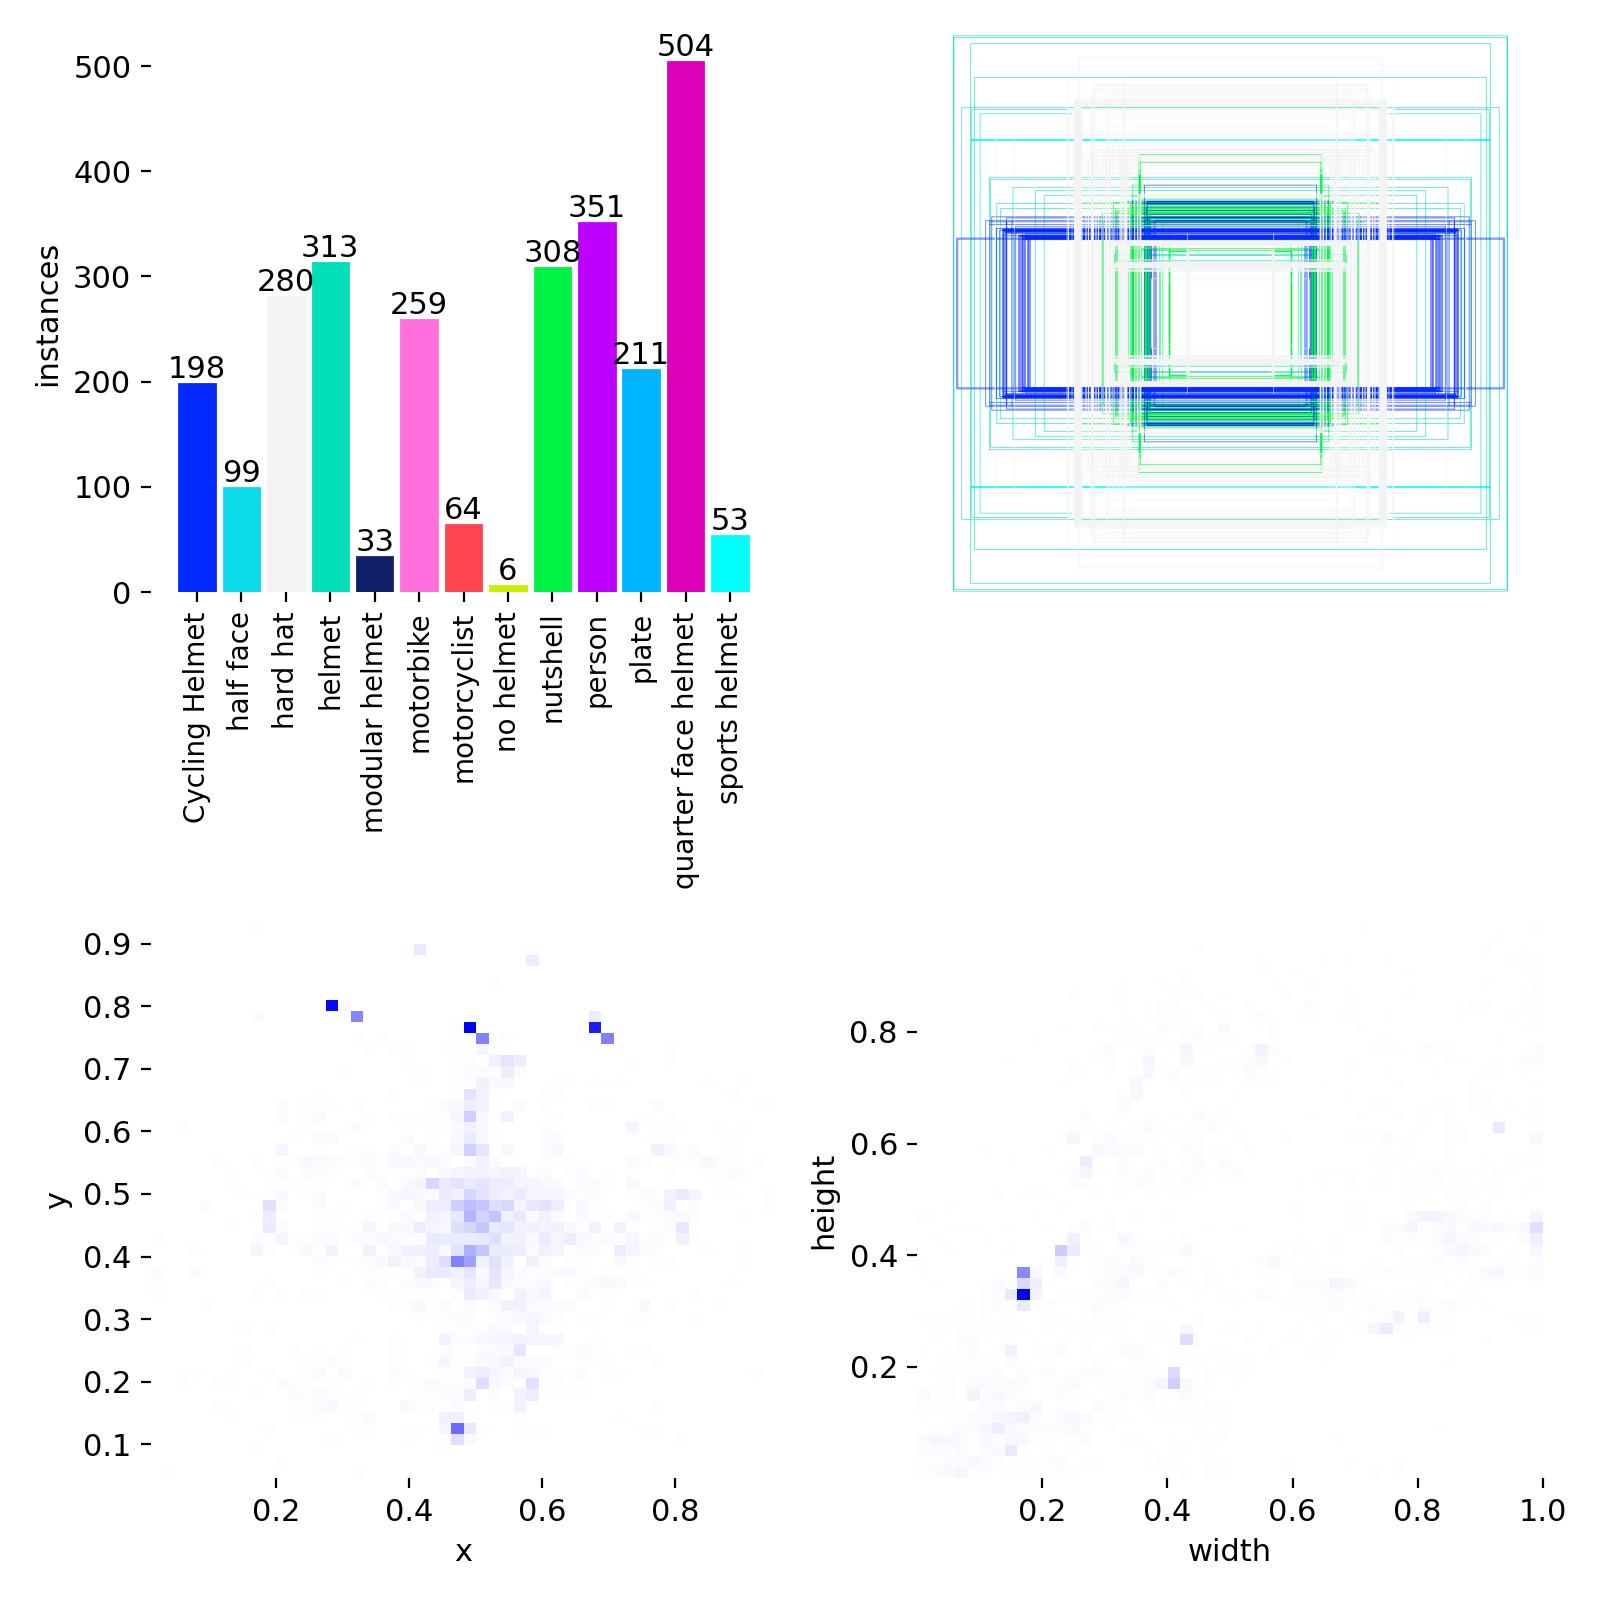

In [ ]:
Image("/content/runs/detect/train2/labels.jpg", width=1000)

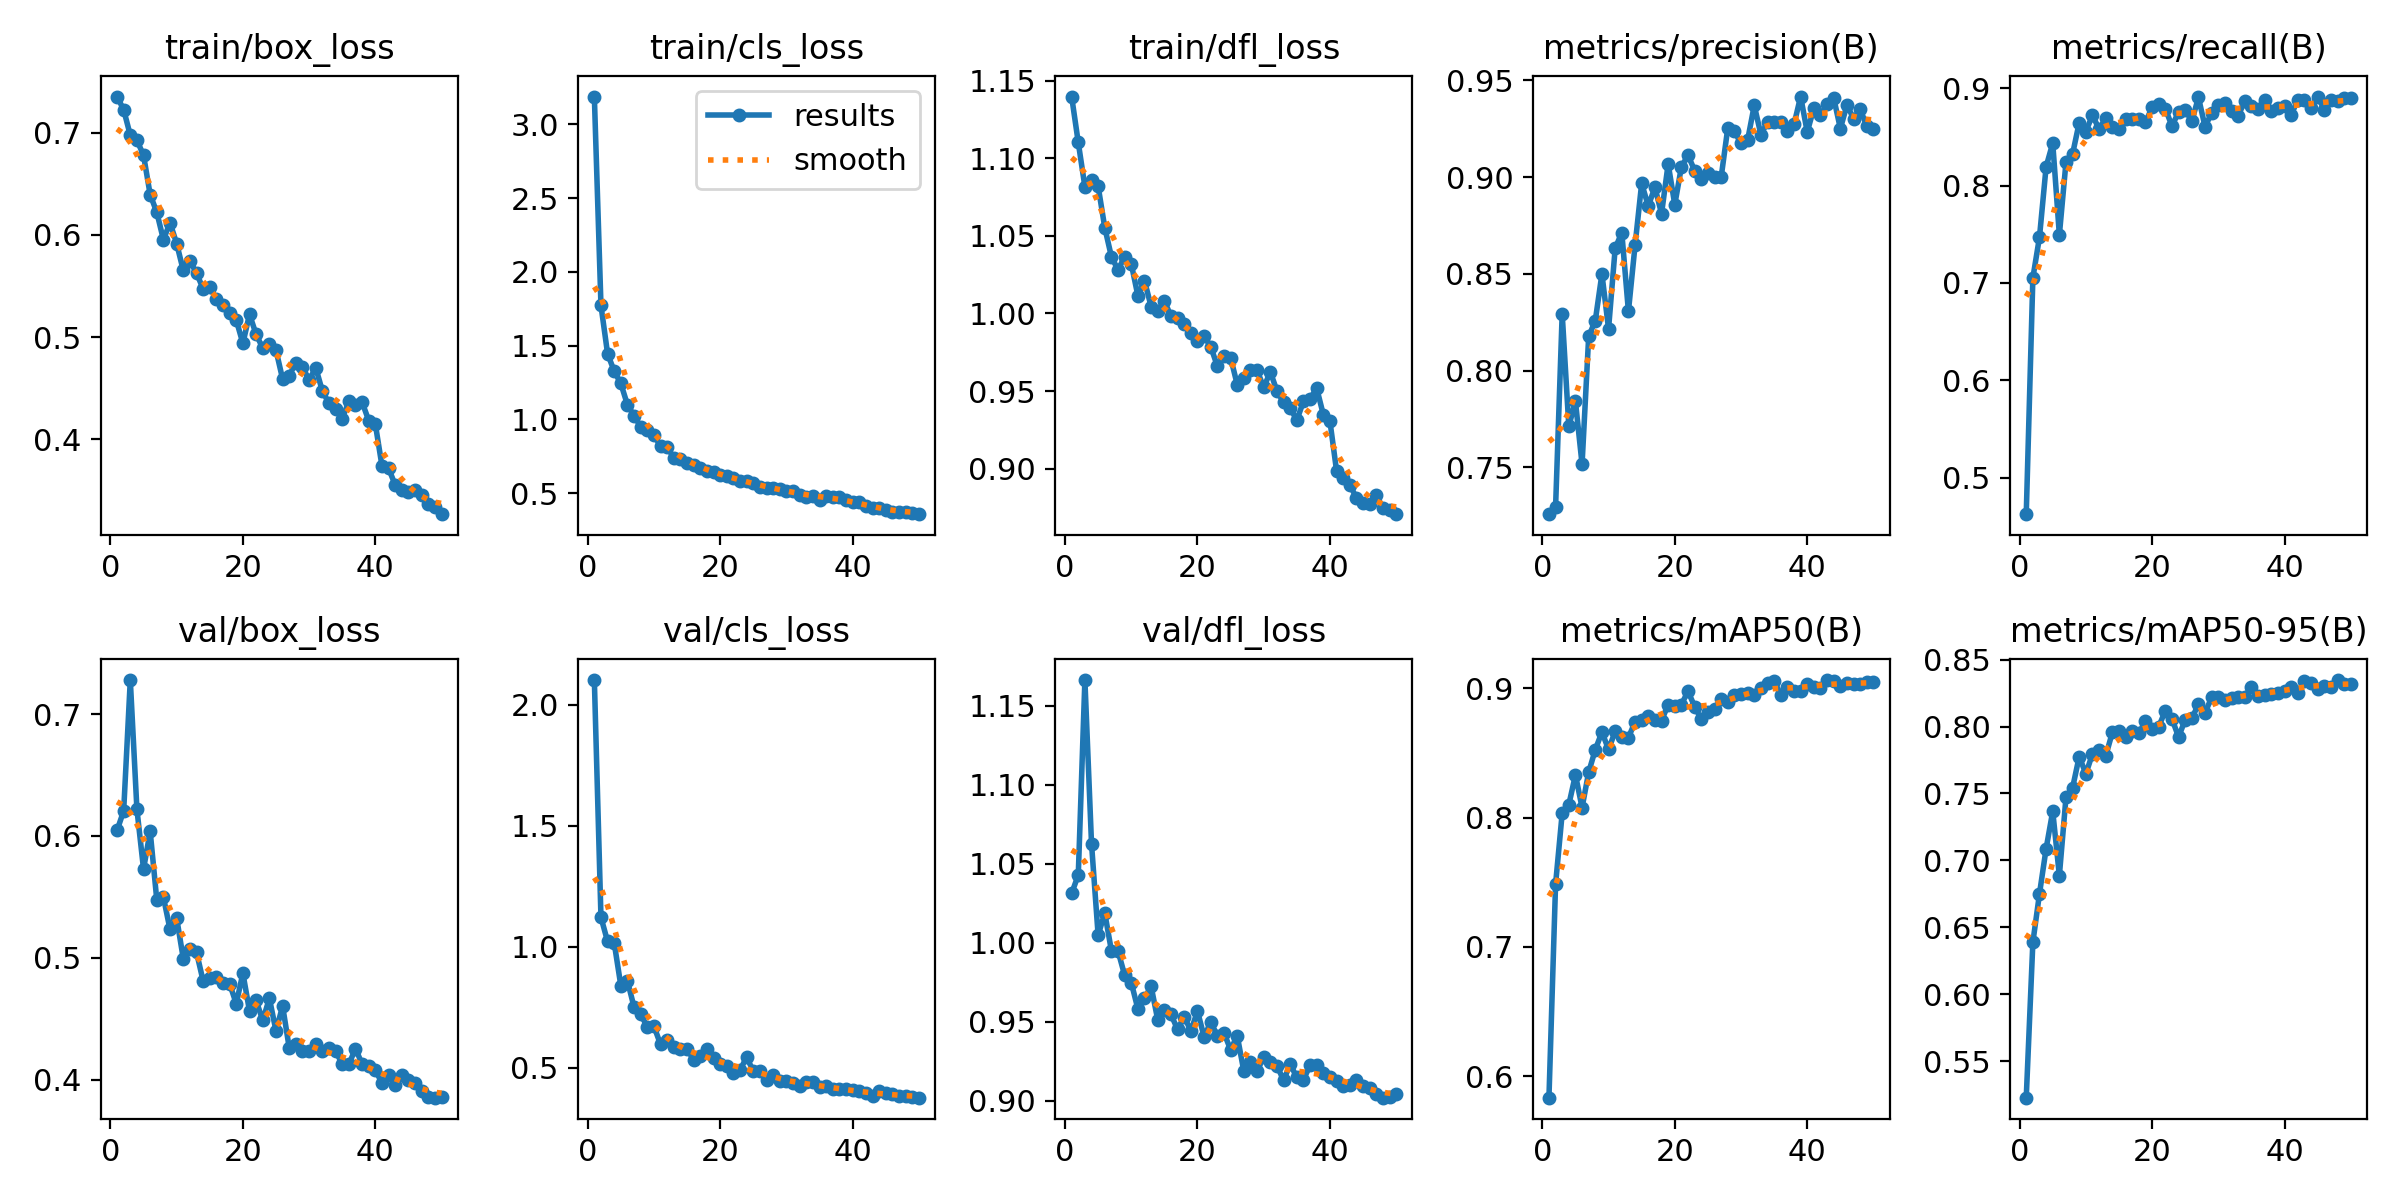

In [ ]:
Image("/content/runs/detect/train2/results.png", width=1000)

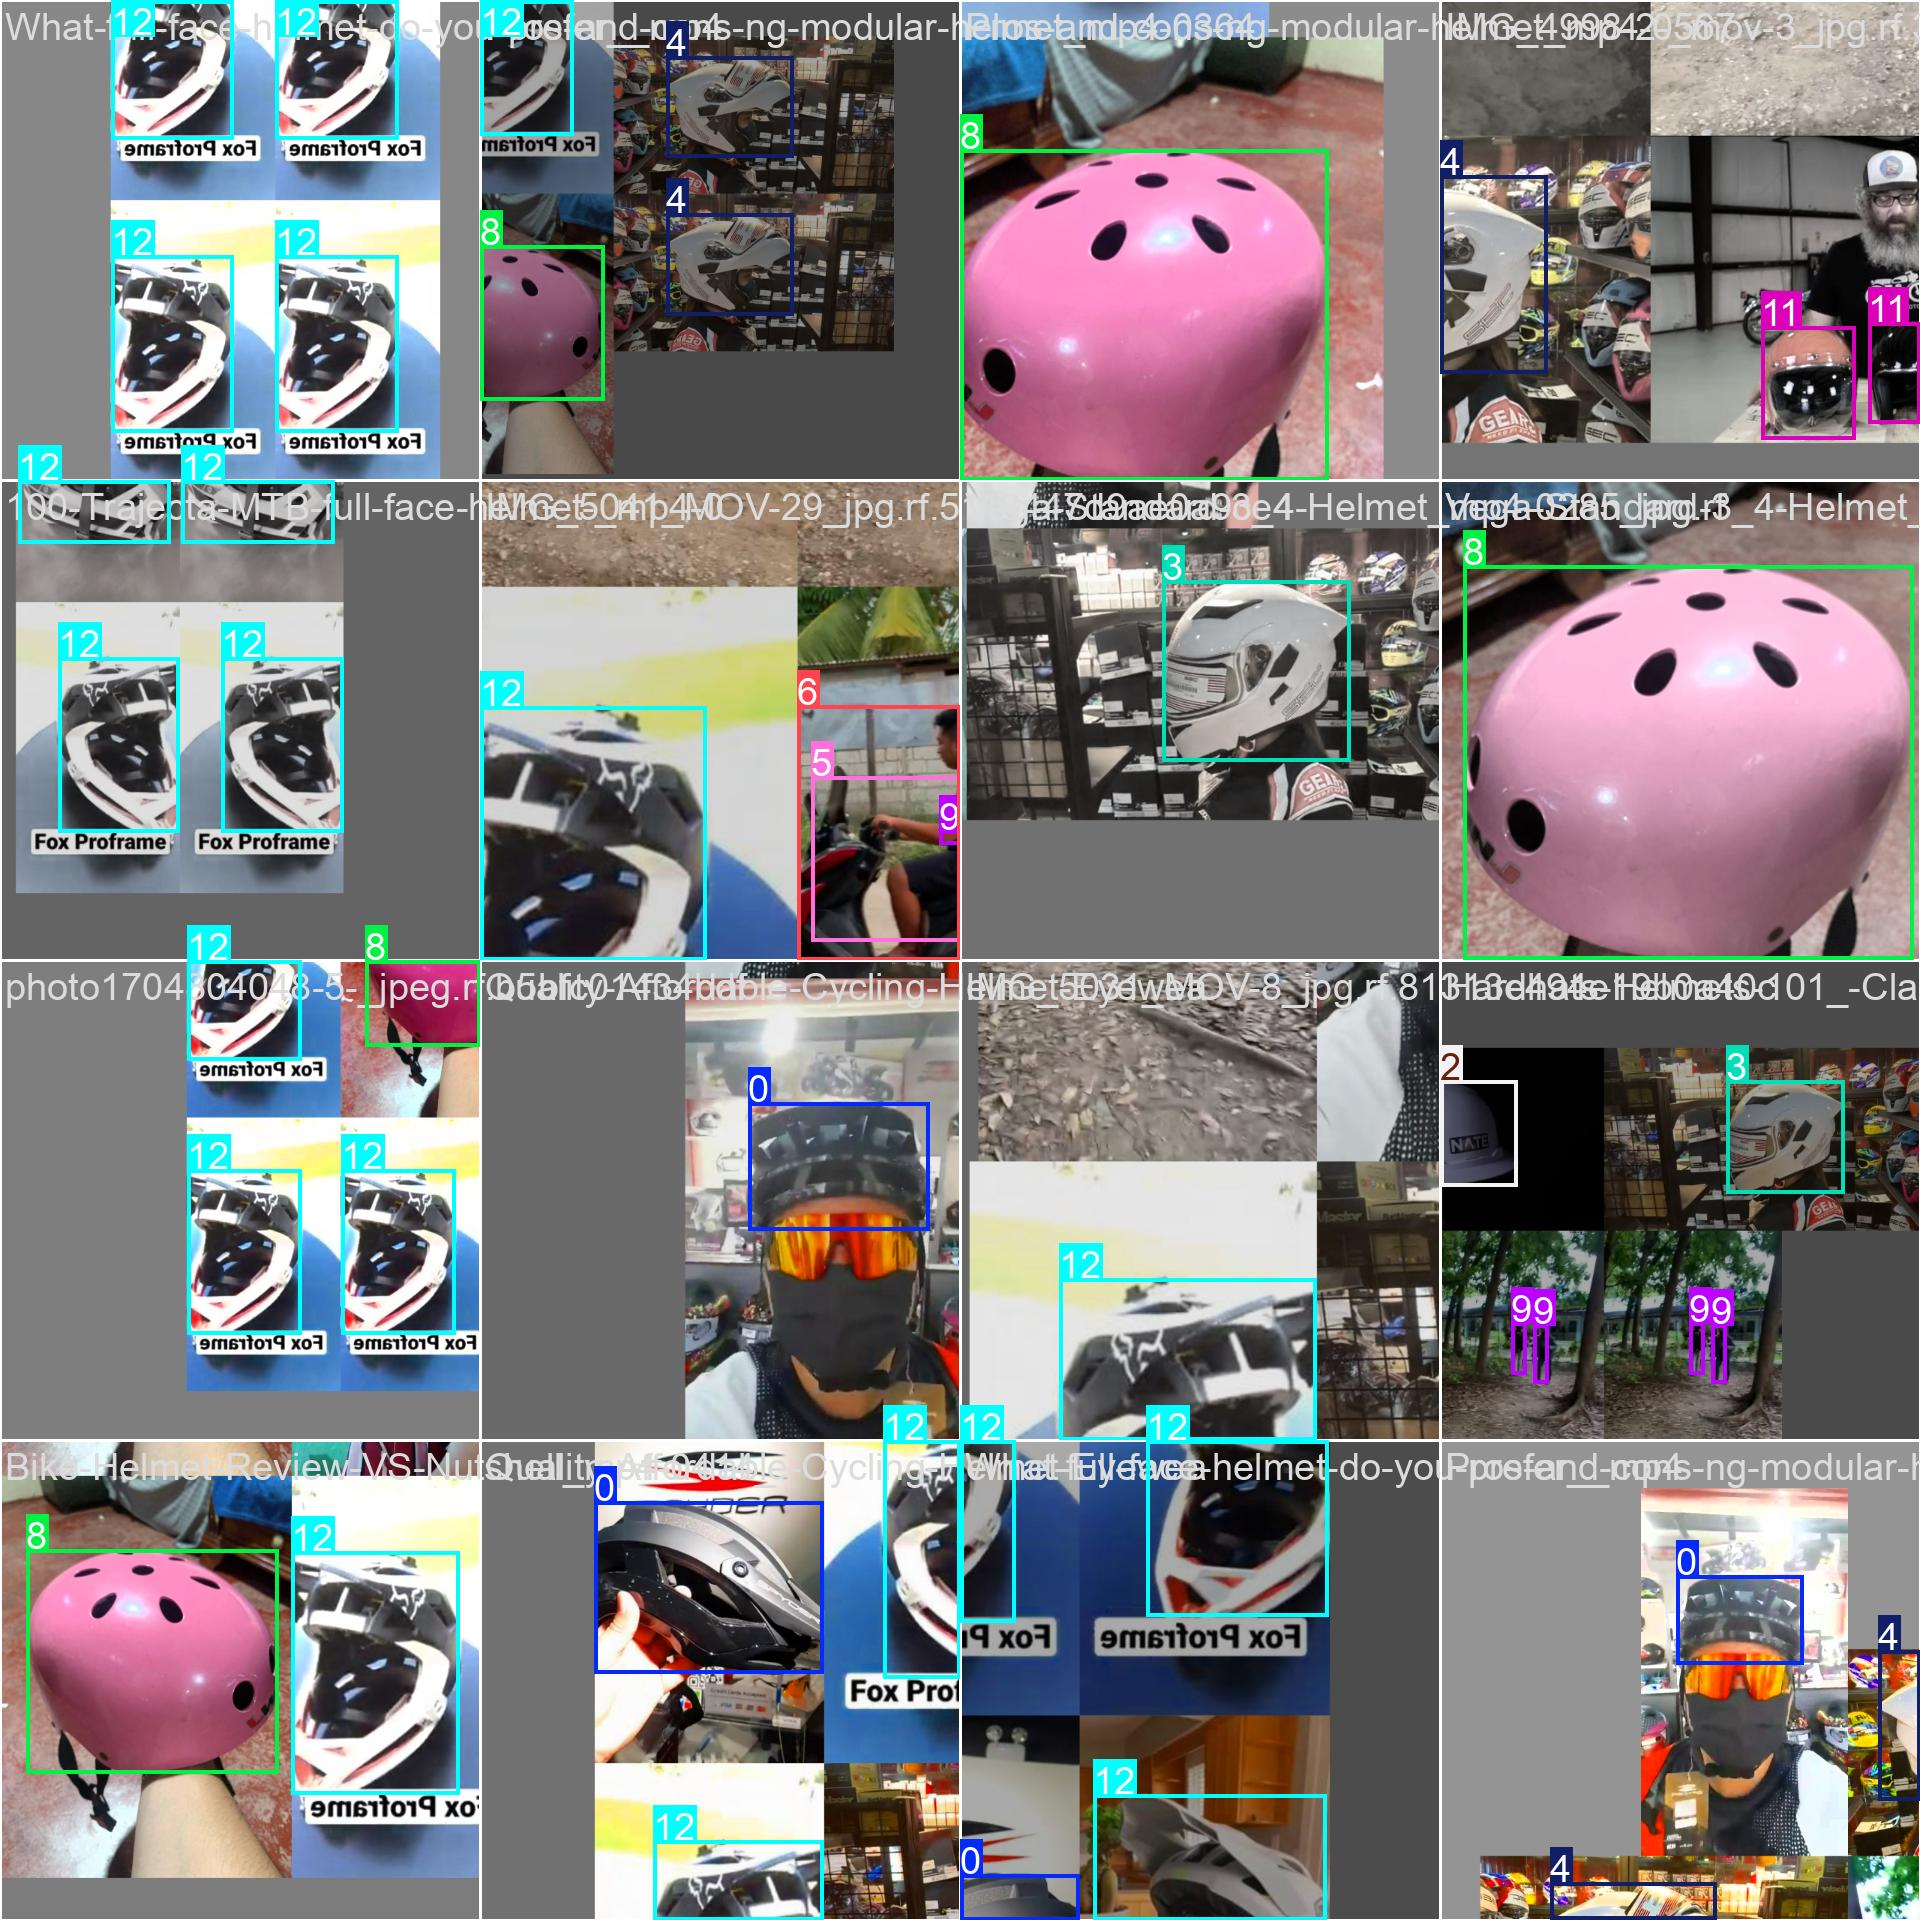

In [ ]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=1000)

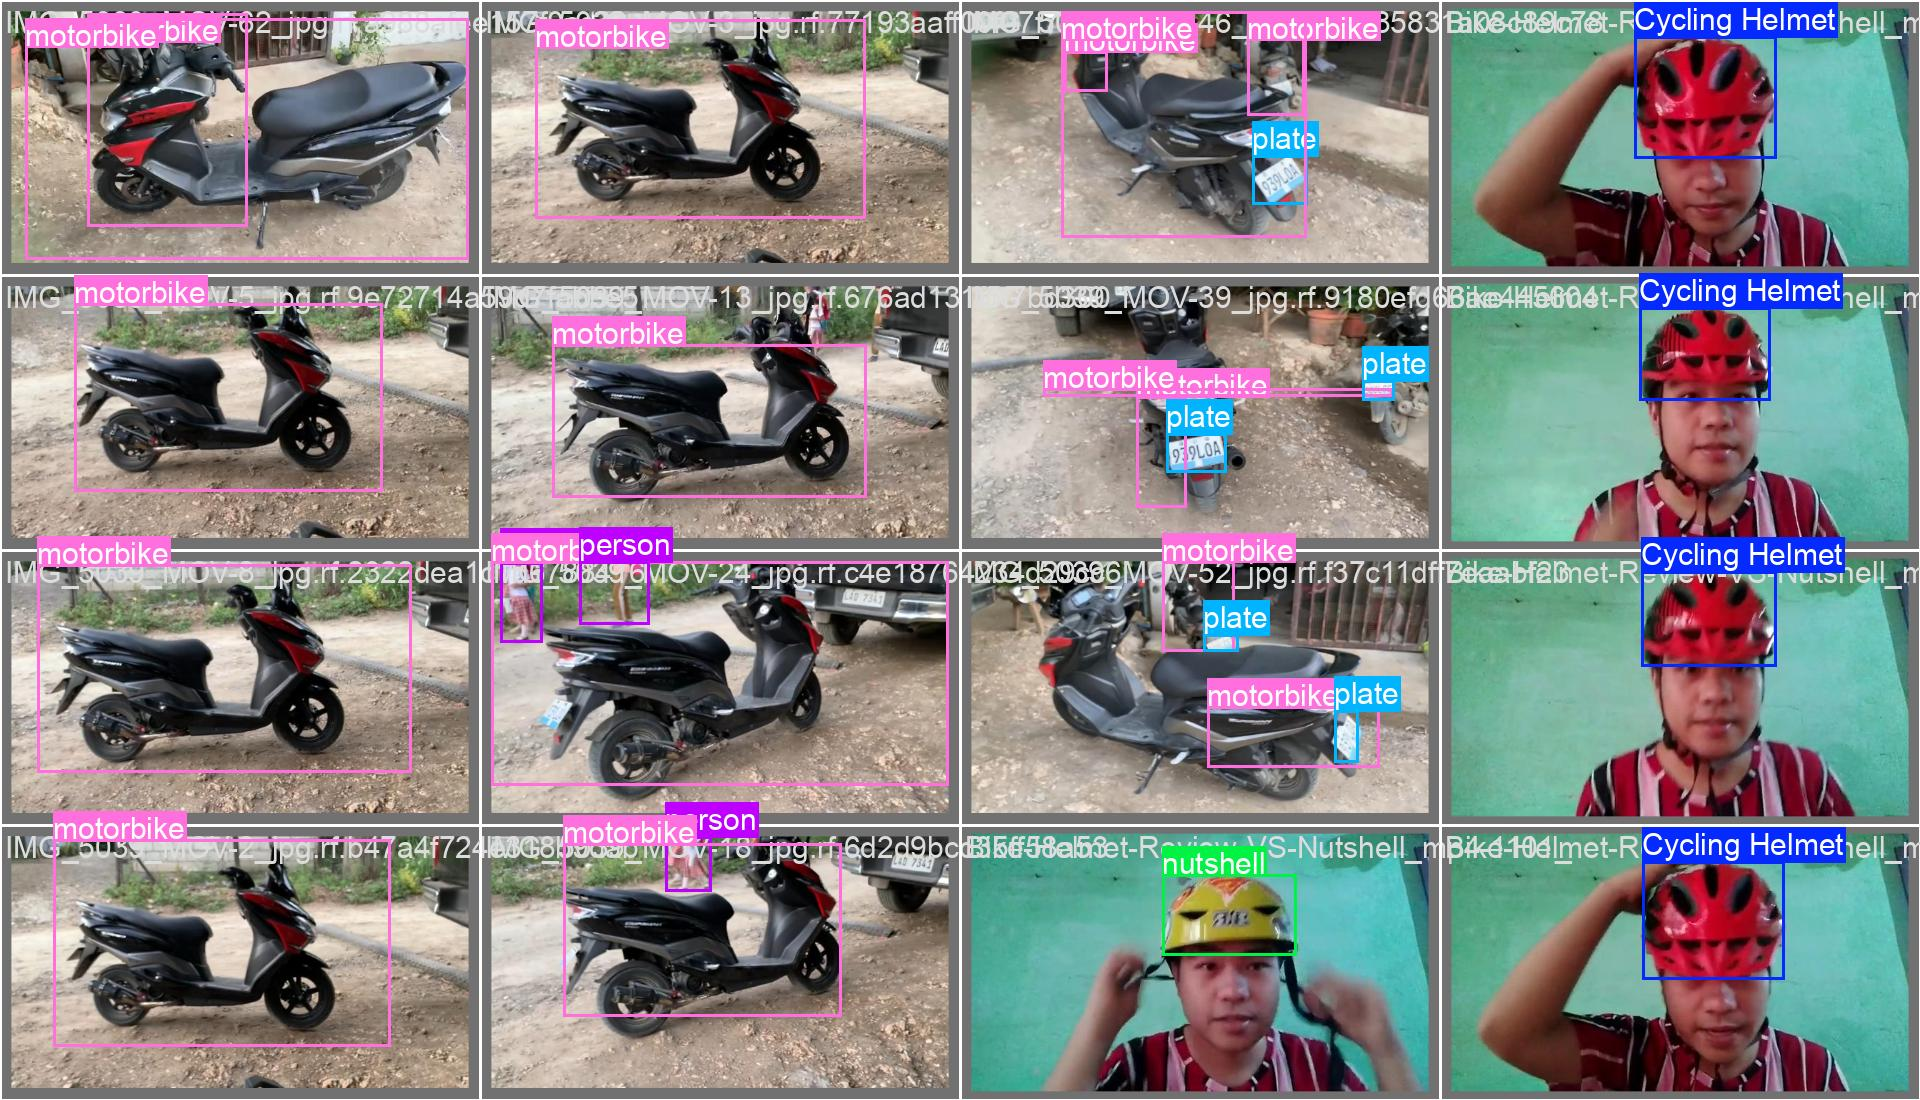

In [ ]:
Image("/content/runs/detect/train2/val_batch0_labels.jpg", width=1000)

## Inference with Custom model on test images

In [ ]:
!yolo task=detect mode=predict data={dataset.location}/data.yaml model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0178_jpg.rf.40daedd08d8ee073d606a4e59773f75d.jpg: 640x384 1 sports helmet, 54.3ms
image 2/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.53fbc18ec2d3dbc33fa2ca90fe4d27f6.jpg: 640x384 1 sports helmet, 7.5ms
image 3/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0186_jpg.rf.4b0cfc853a5cddb12cc069cd568ee13f.jpg: 640x384 1 sports helmet, 9.7ms
image 4/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.ab2c103b611fa0377e8d8833d0d99e72.jpg: 640x384 1 sports helmet, 13.6ms
image 5/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg: 640x384

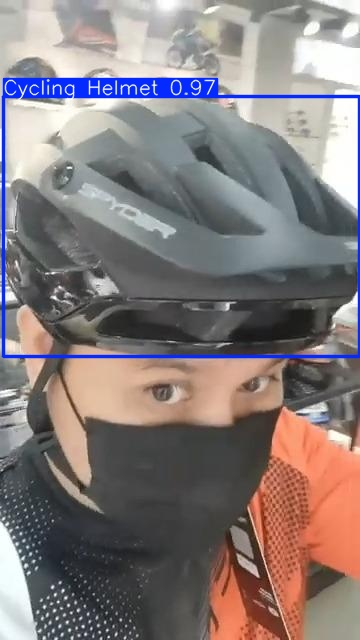

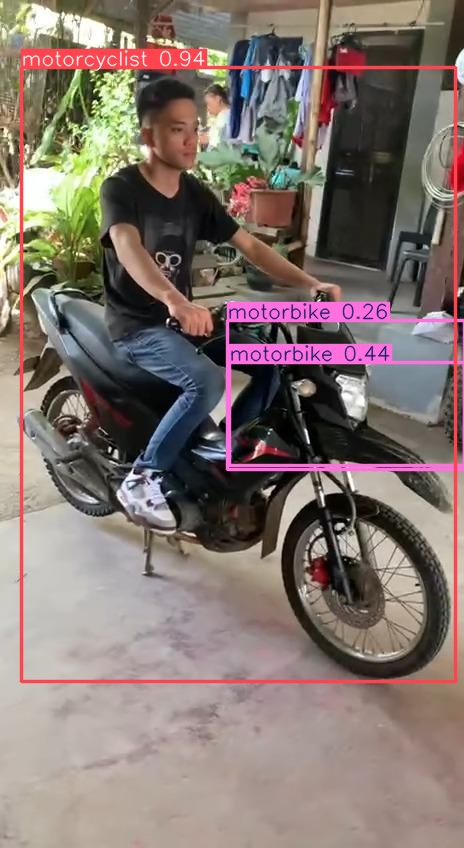

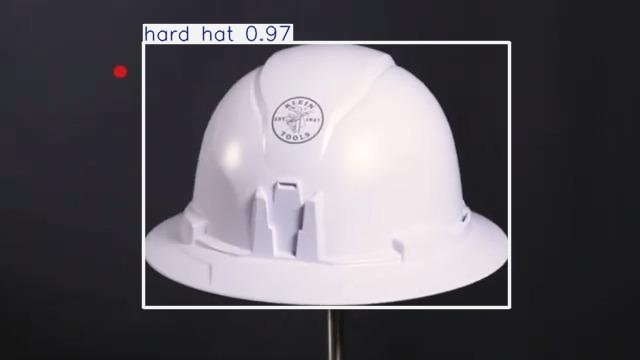

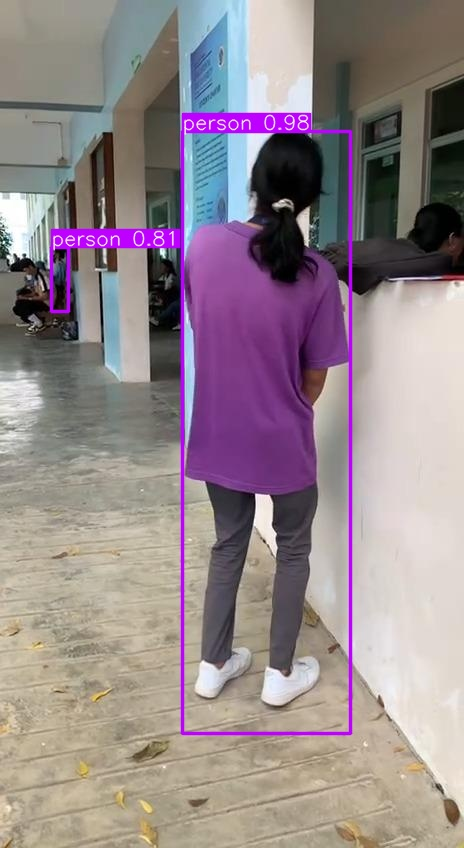

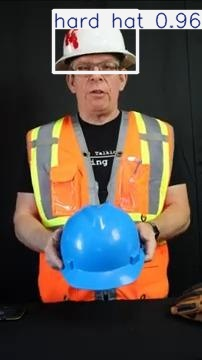

In [ ]:
import glob #Used for searching files/directories using wildcards (*)
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)  # Searches for all folders matching pattern and selects the most recently modified folder
for img in glob.glob(f'{latest_folder}/*.jpg')[10:15]:         # Finds all .jpg files in the latest folder and slices to get only images from index 1 to 3 (3 images)
    display(IPyImage(filename=img, width=600))
    print("\n")

In [46]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source=helmet_image.jpg save=True

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/helmet_image.jpg: 640x352 1 nutshell, 78.3ms
Speed: 5.0ms preprocess, 78.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 352)
Results saved to /content/runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


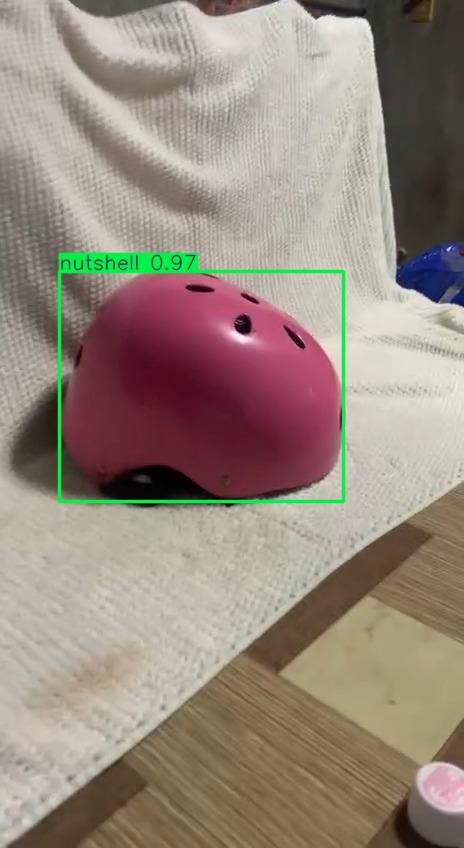

In [47]:
Image("/content/runs/detect/predict7/helmet_image.jpg", width=1000)

## Inference model with Customer model on video

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)